In [1]:
#import packages to use in the program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
"""
   Here I have written a function 
   that takes in the file name as an arguement, 

   then returns two data frames as described in the question
   
   I also added another arguement *skip*, 
   so that dataframe starts from where 
   the data starts from, skipping the headings
"""
df_world_bank = {}
#constant has their variable name in capital(PEP8)
DIR_FILENAME = "API_19_DS2_en_csv_v2_3931355.csv"
YEARS_IN_ROWS =['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969'
                ,'1970','1971','1972','1973','1974','1975','1976','1977','1978','1979'
                ,'1980','1981','1982','1983','1984','1985','1986','1987','1988','1989'
                ,'1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'
                ,'2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'
                ,'2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'
                ,'2020']
def read_file(filename, skip=0):
    
    #read the data into data frame
    df_world_bank = pd.read_csv(filename, skiprows=skip)
    
    #return the data starting from year column as a separate data frame, then the countries as a second data frame
    return df_world_bank.iloc[:,4:-1], df_world_bank["Country Name"]


### Define functions for dropping rows and columns 

In [3]:
# Function for dropping columns

def drop_columns(dataset,column_names):
    dataset = dataset.drop(column_names,axis = 1)
    return dataset

In [4]:
# Function for droping rows

def drop_rows(dataset,row_names):
    dataset = dataset.drop(row_names,axis = 0)
    return dataset

In [5]:
#calling the declared function and passing the file name
df_years, df_countries = read_file(DIR_FILENAME, 4)

In [6]:
df_world_bank = pd.read_csv(DIR_FILENAME, skiprows=4)

In [7]:
# Mapping of country codes to their actual names
#Countries_Choosen_Map = {

#    "USA": "United States",

#    "IND":"India",

#    "CHN": "China",

#    "JPN": "Japan",

#    "CAN": "Canada",

#    "GBR": "United Kingdom",

#    "ZAF": "South Africa"

#}

Countries_Choosen=['United States', 'India', 'China', 'Japan', 'Canada', 'United Kingdom', 'South Africa']



#Indicator_Choosen_Map={

#    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",

#    "NV.AGR.TOTL.ZS":"Agriculture, forestry, and fishing, value added (% of GDP)",

#    "SP.URB.TOTL": "Urban population",

#    "EN.ATM.CO2E.SF.KT": "CO2 emissions from solid fuel consumption (kt)",

#    "EG.ELC.NGAS.ZS": "Electricity production from natural gas sources (% of total)"

#}


Indicator_Codes_Choosen=['EG.USE.ELEC.KH.PC', 'NV.AGR.TOTL.ZS', 'SP.URB.TOTL','EN.ATM.CO2E.SF.KT','EG.ELC.NGAS.ZS']

In [8]:
#Fetching data for each country using few indicators
def retrive_data_by_Country(df_world_bank, country_name):
    df_country =  df_world_bank[df_world_bank['Country Name']==country_name]

    df_country = df_country[df_country['Indicator Code'].isin(Indicator_Codes_Choosen)]

    columns_to_pick = ['Indicator Name'] + YEARS_IN_ROWS

    df_country = df_country[columns_to_pick].T
    df_country.iloc[0].Name = 'Year'

    df_country.columns = df_country.iloc[0]
    
    df_country = df_country.iloc[1:,:]
    
    df_country.rename(columns = {'Indicator Name':'Year'}, inplace = False)
    
    df_country['Year'] = df_country.index
    
    df_country["Country Name"] = country_name
    
    return df_country

In [9]:
#picking for country United States

united_states = retrive_data_by_Country(df_world_bank, 'United States')

india = retrive_data_by_Country(df_world_bank, 'India')

china = retrive_data_by_Country(df_world_bank, 'China')

japan = retrive_data_by_Country(df_world_bank, 'Japan')

canada = retrive_data_by_Country(df_world_bank, 'Canada')

uk = retrive_data_by_Country(df_world_bank, 'United Kingdom')

south_africa = retrive_data_by_Country(df_world_bank, 'South Africa')

canada

Indicator Name Urban population  \
1960                 12368141.0   
1961                 12729040.0   
1962                 13121753.0   
1963                 13522659.0   
1964                 13934678.0   
...                         ...   
2016                 29357013.0   
2017                 29729597.0   
2018                 30175132.0   
2019                 30631841.0   
2020                 30997832.0   

Indicator Name Agriculture, forestry, and fishing, value added (% of GDP)  \
1960                                                          NaN           
1961                                                          NaN           
1962                                                          NaN           
1963                                                          NaN           
1964                                                          NaN           
...                                                           ...           
2016                                                     1.862226           
2017                                                     1.889995           
2018                                                     1.699892           
2019                                                          NaN           
2020                                                          NaN           

Indicator Name CO2 emissions from solid fuel consumption (kt)  \
1960                                                49676.849   
1961                                                45632.148   
1962                                                47069.612   
1963                                                46636.906   
1964                                                 51961.39   
...                                                       ...   
2016                                                65862.987   
2017                                                      NaN   
2018                                                      NaN   
2019                                                      NaN   
2020                                                      NaN   

Indicator Name Electric power consumption (kWh per capita)  \
1960                                           5630.629813   
1961                                           5605.111926   
1962                                            5791.12496   
1963                                            5966.04092   
1964                                           6468.926261   
...                                                    ...   
2016                                                   NaN   
2017                                                   NaN   
2018                                                   NaN   
2019                                                   NaN   
2020                                                   NaN   

Indicator Name Electricity production from natural gas sources (% of total)  \
1960                                                     3.504475             
1961                                                     3.726961             
1962                                                     3.681449             
1963                                                     3.546037             
1964                                                     3.170909             
...                                                           ...             
2016                                                          NaN             
2017                                                          NaN             
2018                                                          NaN             
2019                                                          NaN             
2020                                                          NaN             

Indicator Name  Year Country Name  
1960            1960       Canada  
1961            1961       Canada  
1962            1962       Canada  
1963            1963       Canada  

In [10]:
# Function to fill the remaining missing values with average values for columns

def fill_missing_values(df):
    
    # create a copy
    df_cp=df.copy()
    
    # get the list of columns in the dataframe
    cols_list=list(df_cp.columns)
    
    # exclude the last column - Country Name
    # This column was added explicitly when the data was loaded, hence, it does not contain any missing values.
    # Also, fillna function does not work on categorical features since it performs an aggregation.
    cols_list.pop()
    
    # replace all None values with NaN, fillna only works on nans
    df_cp.fillna(value=pd.np.nan, inplace=True)
    
    # replace all NaN values with the mean of the column values
    for col in cols_list:
        df_cp[col].fillna((df_cp[col].mean()), inplace=True)
    return df_cp

In [11]:

united_states = fill_missing_values(united_states)

india = fill_missing_values(india)

china = fill_missing_values(china)

japan = fill_missing_values(japan)

canada = fill_missing_values(canada)

uk = fill_missing_values(uk)

south_africa = fill_missing_values(south_africa)

# store all the DataFrames in a list to iteratively apply pre-processing steps

list_of_countries=[united_states.copy(), india.copy(), china.copy(), japan.copy(), canada.copy(), uk.copy(), south_africa.copy()]

In [12]:
df_all_countries = pd.concat(list_of_countries)
df_all_countries.head()

Indicator Name  Urban population  \
1960                 126462473.0   
1961                 129276215.0   
1962                 131988693.0   
1963                 134615404.0   
1964                 137215986.0   

Indicator Name  Agriculture, forestry, and fishing, value added (% of GDP)  \
1960                                                     1.099231            
1961                                                     1.099231            
1962                                                     1.099231            
1963                                                     1.099231            
1964                                                     1.099231            

Indicator Name  CO2 emissions from solid fuel consumption (kt)  \
1960                                                918715.512   
1961                                                888169.402   
1962                                                921572.105   
1963                                                987816.460   
1964                                               1050034.449   

Indicator Name  Electric power consumption (kWh per capita)  \
1960                                            4049.786629   
1961                                            4182.175501   
1962                                            4433.606021   
1963                                            4690.486256   
1964                                            4970.446456   

Indicator Name  Electricity production from natural gas sources (% of total)  \
1960                                                    21.140983              
1961                                                    21.521539              
1962                                                    21.777894              
1963                                                    22.244933              
1964                                                    22.596072              

Indicator Name  Year   Country Name  
1960            1960  United States  
1961            1961  United States  
1962            1962  United States  
1963            1963  United States  
1964            1964  United States

In [13]:
#Descriptive Statistics
df_all_countries_copy=df_all_countries.drop(['Year', 'Country Name'], axis='columns')
df_all_countries_copy.describe()

Indicator Name  Urban population  \
count               4.270000e+02   
mean                1.418821e+08   
std                 1.597994e+08   
min                 7.971773e+06   
25%                 3.030864e+07   
50%                 9.269648e+07   
75%                 1.889568e+08   
max                 8.667057e+08   

Indicator Name  Agriculture, forestry, and fishing, value added (% of GDP)  \
count                                                  427.000000            
mean                                                     8.629902            
std                                                     11.965667            
min                                                      0.545491            
25%                                                      1.099231            
50%                                                      1.876399            
75%                                                     11.325577            
max                                                     42.767622            

Indicator Name  CO2 emissions from solid fuel consumption (kt)  \
count                                             4.270000e+02   
mean                                              7.779266e+05   
std                                               1.183995e+06   
min                                               4.501243e+04   
25%                                               1.466763e+05   
50%                                               3.021755e+05   
75%                                               1.069228e+06   
max                                               7.499587e+06   

Indicator Name  Electric power consumption (kWh per capita)  \
count                                            427.000000   
mean                                            5650.232840   
std                                             4796.396316   
min                                               97.772718   
25%                                             1080.455213   
50%                                             4579.952732   
75%                                             8268.053416   
max                                            17264.736744   

Indicator Name  Electricity production from natural gas sources (% of total)  
count                                                  427.000000             
mean                                                     8.409490             
std                                                     10.589728             
min                                                      0.000000             
25%                                                      0.465806             
50%                                                      3.681449             
75%                                                     14.502159             
max                                                     46.325546

In [14]:
#Correlation and non-correlation
df_all_countries_copy.corr()

Indicator Name                                      Urban population  \
Indicator Name                                                         
Urban population                                            1.000000   
Agriculture, forestry, and fishing, value added...          0.272930   
CO2 emissions from solid fuel consumption (kt)              0.831502   
Electric power consumption (kWh per capita)                -0.312609   
Electricity production from natural gas sources...         -0.040557   

Indicator Name                                      Agriculture, forestry, and fishing, value added (% of GDP)  \
Indicator Name                                                                                                   
Urban population                                                                             0.272930            
Agriculture, forestry, and fishing, value added...                                           1.000000            
CO2 emissions from solid fuel consumption (kt)                                               0.054639            
Electric power consumption (kWh per capita)                                                 -0.618609            
Electricity production from natural gas sources...                                          -0.351820            

Indicator Name                                      CO2 emissions from solid fuel consumption (kt)  \
Indicator Name                                                                                       
Urban population                                                                          0.831502   
Agriculture, forestry, and fishing, value added...                                        0.054639   
CO2 emissions from solid fuel consumption (kt)                                            1.000000   
Electric power consumption (kWh per capita)                                              -0.099636   
Electricity production from natural gas sources...                                       -0.045607   

Indicator Name                                      Electric power consumption (kWh per capita)  \
Indicator Name                                                                                    
Urban population                                                                      -0.312609   
Agriculture, forestry, and fishing, value added...                                    -0.618609   
CO2 emissions from solid fuel consumption (kt)                                        -0.099636   
Electric power consumption (kWh per capita)                                            1.000000   
Electricity production from natural gas sources...                                     0.310482   

Indicator Name                                      Electricity production from natural gas sources (% of total)  
Indicator Name                                                                                                    
Urban population                                                                            -0.040557             
Agriculture, forestry, and fishing, value added...                                          -0.351820             
CO2 emissions from solid fuel consumption (kt)                                              -0.045607             
Electric power consumption (kWh per capita)                                                  0.310482             
Electricity production from natural gas sources...                                           1.000000

In [15]:
df_all_countries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 1960 to 2020
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Urban population                                              427 non-null    float64
 1   Agriculture, forestry, and fishing, value added (% of GDP)    427 non-null    float64
 2   CO2 emissions from solid fuel consumption (kt)                427 non-null    float64
 3   Electric power consumption (kWh per capita)                   427 non-null    float64
 4   Electricity production from natural gas sources (% of total)  427 non-null    float64
dtypes: float64(5)
memory usage: 20.0+ KB


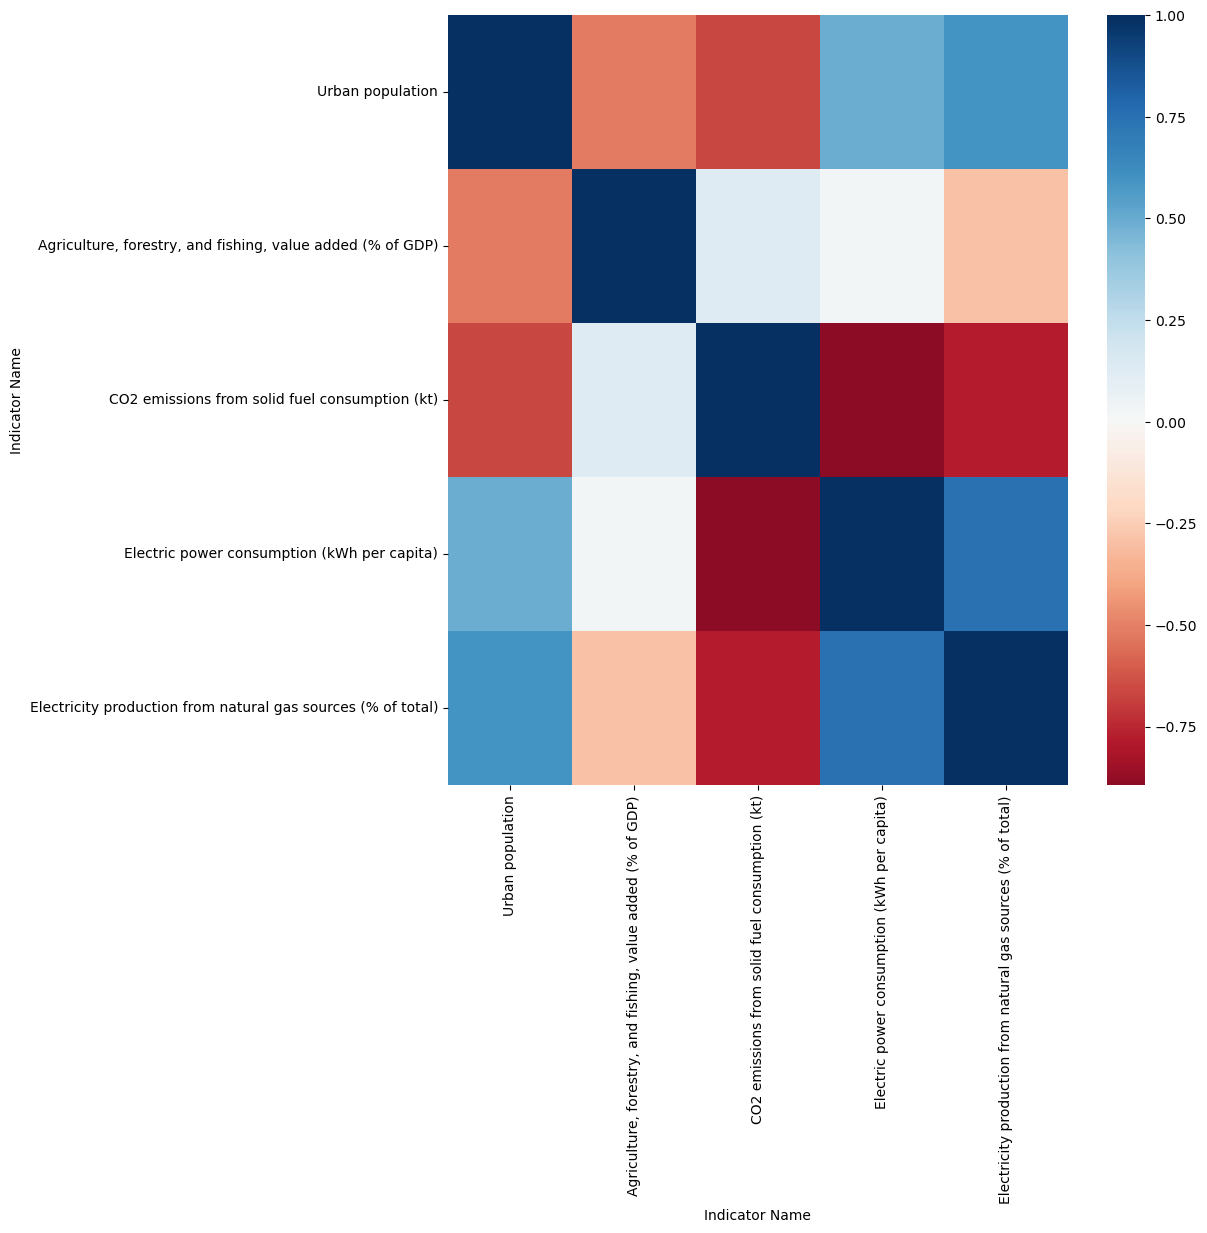

In [16]:
#Correlation Matrix
# create a copy
df_cleaned_us_copy=uk.copy()
# Exclude the categorical features from the matrix
df_cleaned_us_copy.drop(['Year', 'Country Name'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cleaned_us_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()

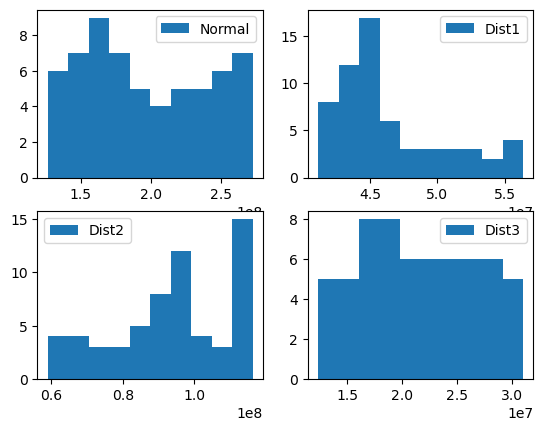

In [17]:
plt.figure()
plt.subplot(2,2,1)
plt.hist(united_states["Urban population"], label="Normal")
plt.legend()

plt.subplot(2,2,2)
plt.hist(uk["Urban population"], label="Dist1")
plt.legend()

plt.subplot(2,2,3)
plt.hist(japan["Urban population"], label="Dist2")
plt.legend()

plt.subplot(2,2,4)
plt.hist(canada["Urban population"], label="Dist3")
plt.legend()

plt.show()

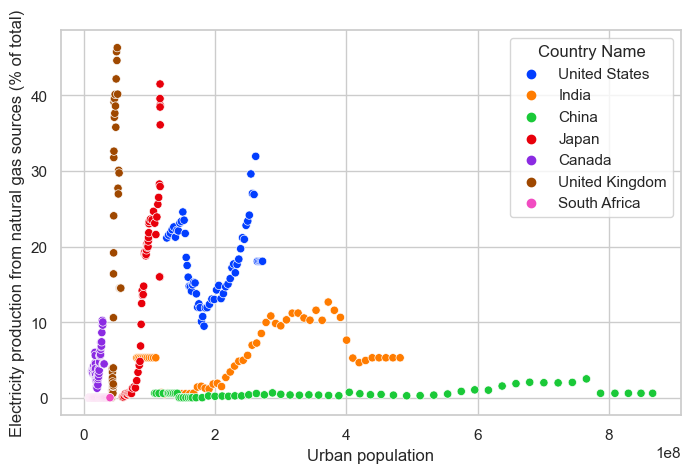

In [18]:
# Plotting scatter plot to check correllation
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='Urban population', y='Electricity production from natural gas sources (% of total)', hue='Country Name', palette="bright", data=df_all_countries)

### Load in the datasets, using other Analytics Method and Comparison with All Countries DataSet

In [19]:
# Load in the data gotten from then world bank and display the first 5 rows of the data

df_world_bank = pd.read_csv("API_19_DS2_en_csv_v2_3931355.csv", skiprows=4)
df_all_countries =pd.read_csv('all_countries.csv', delimiter=',')
df_world_bank.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Urban population (% of total population)   
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code       1960          1961          1962          1963  \
0  SP.URB.TOTL.IN.ZS     50.776     50.761000     50.746000     50.730000   
1        SP.URB.TOTL  27525.000  28139.000000  28537.000000  28763.000000   
2        SP.URB.GROW        NaN      2.206183      1.404498      0.788835   
3        SP.POP.TOTL  54208.000  55434.000000  56234.000000  56699.000000   
4        SP.POP.GROW        NaN      2.236462      1.432843      0.823502   

           1964          1965  ...           2012           2013  \
0     50.715000     50.700000  ...      42.957000      42.990000   
1  28922.000000  29080.000000  ...   44059.000000   44351.000000   
2      0.551271      0.544810  ...       0.543931       0.660561   
3  57029.000000  57357.000000  ...  102565.000000  103165.000000   
4      0.580334      0.573498  ...       0.503385       0.583290   

            2014           2015           2016           2017           2018  \
0      43.041000      43.108000      43.192000      43.293000      43.411000   
1   44666.000000   44978.000000   45293.000000   45614.000000   45949.000000   
2       0.707733       0.696090       0.697901       0.706219       0.731740   
3  103776.000000  104339.000000  104865.000000  105361.000000  105846.000000   
4       0.590508       0.541048       0.502860       0.471874       0.459266   

            2019           2020  Unnamed: 65  
0      43.546000      43.697000          NaN  
1   46294.000000   46654.000000          NaN  
2       0.748028       0.774631          NaN  
3  106310.000000  106766.000000          NaN  
4       0.437415       0.428017          NaN  

[5 rows x 66 columns]

In [20]:
df_world_bank.nunique()

Country Name       266
Country Code       266
Indicator Name      76
Indicator Code      76
1960              2426
                  ... 
2017              7180
2018              6804
2019              3287
2020              2804
Unnamed: 65          0
Length: 66, dtype: int64

In [21]:
df_all_countries.head()

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [22]:
df_all_countries.rename(columns={'name':'Country Name', 'alpha-3':'Country Code', 'region':'Continent'}, inplace=True)
df_all_countries_final = df_all_countries[['Country Name', 'Country Code', 'Continent']]
df_all_countries_final.head()

Country Name Country Code Continent
0     Afghanistan          AFG      Asia
1   Åland Islands          ALA    Europe
2         Albania          ALB    Europe
3         Algeria          DZA    Africa
4  American Samoa          ASM   Oceania

In [23]:
df_all_countries_final.shape

(249, 3)

In [24]:
df_all_countries_final.nunique()

Country Name    249
Country Code    249
Continent         5
dtype: int64

In [25]:
# Check the number of rows and columns in the dataframe
df_world_bank.shape

(20216, 66)

We found that there are 20216 rows and 66 columns in the loaded dataframe.

In [26]:
# Summary statistics presented in a transposed format

df_world_bank.describe().T

count          mean           std          min       25%  \
1960         3140.0  2.015940e+07  1.766754e+08    -3.667000  1.658243   
1961         4546.0  1.476890e+07  1.579775e+08    -3.667000  2.727489   
1962         4727.0  1.488896e+07  1.643346e+08    -3.667000  2.894394   
1963         4587.0  1.642074e+07  1.826950e+08  -370.367000  2.724582   
1964         4643.0  1.688664e+07  1.898123e+08    -3.667000  2.651414   
...             ...           ...           ...          ...       ...   
2017         8067.0  1.553889e+07  2.046260e+08   -28.307232  2.170596   
2018         7445.0  1.709443e+07  2.158258e+08 -1275.189986  2.066193   
2019         3718.0  3.435867e+07  3.084641e+08   -18.600160  2.763476   
2020         2999.0  4.320922e+07  3.472421e+08   -34.208963  2.600000   
Unnamed: 65     0.0           NaN           NaN          NaN       NaN   

                   50%          75%           max  
1960         42.140500  6640.735250  3.040000e+09  
1961         30.368305  1764.864977  3.428000e+09  
1962         35.428305  1786.300000  3.797000e+09  
1963         30.895000  1831.447613  4.362000e+09  
1964         31.158000  1824.767669  4.653000e+09  
...                ...          ...           ...  
2017         22.925868  1279.250000  7.519183e+09  
2018         22.925044  1998.141844  7.602454e+09  
2019         30.749500   100.000000  7.683372e+09  
2020         23.004831   282.700000  7.761620e+09  
Unnamed: 65        NaN          NaN           NaN  

[62 rows x 8 columns]

Much insights cannot be drawn from the summary statistics table presented above as we do cannot identify the indicator whose summary corresponds with the output result above.

### Check for missing observations

In [27]:
# Check for missing observations

df_world_bank.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              17076
                  ...  
2017              12149
2018              12771
2019              16498
2020              17217
Unnamed: 65       20216
Length: 66, dtype: int64

In [28]:
# Check for the percentage of missing observations in each column

percent_missing = df_world_bank.isnull().sum() * 100 / len(df_world_bank)
percent_missing

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1960               84.467748
                     ...    
2017               60.095964
2018               63.172734
2019               81.608627
2020               85.165216
Unnamed: 65       100.000000
Length: 66, dtype: float64

We observed that there are a lot of missing observations in the dataframe. Hence, we shall at a later time limit the years under study to contain only records from year 2000 to year 2020

### Transpose the dataframe (data)

In [29]:
# Transpose the dataframe to make the country column the index and the year the columns

Transpose = df_world_bank.T
Transpose.head()

0                 1      \
Country Name                                       Aruba             Aruba   
Country Code                                         ABW               ABW   
Indicator Name  Urban population (% of total population)  Urban population   
Indicator Code                         SP.URB.TOTL.IN.ZS       SP.URB.TOTL   
1960                                              50.776           27525.0   

                                             2                  3      \
Country Name                                 Aruba              Aruba   
Country Code                                   ABW                ABW   
Indicator Name  Urban population growth (annual %)  Population, total   
Indicator Code                         SP.URB.GROW        SP.POP.TOTL   
1960                                           NaN            54208.0   

                                       4      \
Country Name                           Aruba   
Country Code                             ABW   
Indicator Name  Population growth (annual %)   
Indicator Code                   SP.POP.GROW   
1960                                     NaN   

                                                            5      \
Country Name                                                Aruba   
Country Code                                                  ABW   
Indicator Name  Poverty headcount ratio at $1.90 a day (2011 P...   
Indicator Code                                        SI.POV.DDAY   
1960                                                          NaN   

                                                            6      \
Country Name                                                Aruba   
Country Code                                                  ABW   
Indicator Name  Prevalence of underweight, weight for age (% o...   
Indicator Code                                     SH.STA.MALN.ZS   
1960                                                          NaN   

                                                      7      \
Country Name                                          Aruba   
Country Code                                            ABW   
Indicator Name  Community health workers (per 1,000 people)   
Indicator Code                               SH.MED.CMHW.P3   
1960                                                    NaN   

                                                          8      \
Country Name                                              Aruba   
Country Code                                                ABW   
Indicator Name  Mortality rate, under-5 (per 1,000 live births)   
Indicator Code                                      SH.DYN.MORT   
1960                                                        NaN   

                                                            9      ...  \
Country Name                                                Aruba  ...   
Country Code                                                  ABW  ...   
Indicator Name  Primary completion rate, total (% of relevant ...  ...   
Indicator Code                                     SE.PRM.CMPT.ZS  ...   
1960                                                          NaN  ...   

                                       20206                 20207  \
Country Name                        Zimbabwe              Zimbabwe   
Country Code                             ZWE                   ZWE   
Indicator Name  Forest area (% of land area)  Forest area (sq. km)   
Indicator Code                AG.LND.FRST.ZS        AG.LND.FRST.K2   
1960                                     NaN                   NaN   

                                                            20208  \
Country Name                                             Zimbabwe   
Country Code                                                  ZWE   
Indicator Name  Land area where elevation is below 5 meters (%...   
Indicator Code                                     AG.LND.EL5M.ZS   
1960                           

Upon transposing the dataframe, we found that the data structure is not so useable as we have a couple of unneeded rows in the transposed dataframe. We shall proceed to dropping some of these columns. We would have dropped all, but it might be difficult to identify the respective indicators at a later time. Also, transposing the dataframe has tremendously increased to 20216 columns as against 66 columns in the original dataframe.

In [30]:
# Processing the dataframe to make the country column the index and the year the columns

dataset_Transposed = drop_rows(Transpose, ['Country Code', 'Indicator Code'])
dataset_Transposed.head()

0                 1      \
Country Name                                       Aruba             Aruba   
Indicator Name  Urban population (% of total population)  Urban population   
1960                                              50.776           27525.0   
1961                                              50.761           28139.0   
1962                                              50.746           28537.0   

                                             2                  3      \
Country Name                                 Aruba              Aruba   
Indicator Name  Urban population growth (annual %)  Population, total   
1960                                           NaN            54208.0   
1961                                      2.206183            55434.0   
1962                                      1.404498            56234.0   

                                       4      \
Country Name                           Aruba   
Indicator Name  Population growth (annual %)   
1960                                     NaN   
1961                                2.236462   
1962                                1.432843   

                                                            5      \
Country Name                                                Aruba   
Indicator Name  Poverty headcount ratio at $1.90 a day (2011 P...   
1960                                                          NaN   
1961                                                          NaN   
1962                                                          NaN   

                                                            6      \
Country Name                                                Aruba   
Indicator Name  Prevalence of underweight, weight for age (% o...   
1960                                                          NaN   
1961                                                          NaN   
1962                                                          NaN   

                                                      7      \
Country Name                                          Aruba   
Indicator Name  Community health workers (per 1,000 people)   
1960                                                    NaN   
1961                                                    NaN   
1962                                                    NaN   

                                                          8      \
Country Name                                              Aruba   
Indicator Name  Mortality rate, under-5 (per 1,000 live births)   
1960                                                        NaN   
1961                                                        NaN   
1962                                                        NaN   

                                                            9      ...  \
Country Name                                                Aruba  ...   
Indicator Name  Primary completion rate, total (% of relevant ...  ...   
1960                                                          NaN  ...   
1961                                                          NaN  ...   
1962                                                          NaN  ...   

                                       20206                 20207  \
Country Name                        Zimbabwe              Zimbabwe   
Indicator Name  Forest area (% of land area)  Forest area (sq. km)   
1960                                     NaN                   NaN   
1961                                     NaN                   NaN   
1962                                     NaN                   NaN   

                                                            20208  \
Country Name                                             Zimbabwe   
Indicator Name  Land area where elevation is below 5 meters (%...   
1960                                                          NaN   
1961                                                          NaN   
1962                           

## Preprocessing and Visualization of the Original Dataframe (df)

In [31]:
# Melt the dataframe to convert the year columns into a single column

df = df_world_bank.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
df.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Urban population (% of total population)   
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code  Year      Value  
0  SP.URB.TOTL.IN.ZS  1960     50.776  
1        SP.URB.TOTL  1960  27525.000  
2        SP.URB.GROW  1960        NaN  
3        SP.POP.TOTL  1960  54208.000  
4        SP.POP.GROW  1960        NaN

### Extraction of needed indicators

In [32]:
# Extracting only the needed indicators from the dataframe.
# Here , arable land and forest area are the chosen indicators for this assignment

df_1 = df[(df['Indicator Name'] == "Electric power consumption (kWh per capita)")]
df_2 = df[(df['Indicator Name'] == "Access to electricity (% of population)")]
df_3 = df[(df['Indicator Name'] == "CO2 emissions (kt)")]

# Check the first five records
df_1.head()

Country Name Country Code  \
50                         Aruba          ABW   
126  Africa Eastern and Southern          AFE   
202                  Afghanistan          AFG   
278   Africa Western and Central          AFW   
354                       Angola          AGO   

                                  Indicator Name     Indicator Code  Year  \
50   Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1960   
126  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1960   
202  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1960   
278  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1960   
354  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1960   

     Value  
50     NaN  
126    NaN  
202    NaN  
278    NaN  
354    NaN

In [33]:
# Check the first five records

df_2.head()

Country Name Country Code  \
61                         Aruba          ABW   
137  Africa Eastern and Southern          AFE   
213                  Afghanistan          AFG   
289   Africa Western and Central          AFW   
365                       Angola          AGO   

                              Indicator Name  Indicator Code  Year  Value  
61   Access to electricity (% of population)  EG.ELC.ACCS.ZS  1960    NaN  
137  Access to electricity (% of population)  EG.ELC.ACCS.ZS  1960    NaN  
213  Access to electricity (% of population)  EG.ELC.ACCS.ZS  1960    NaN  
289  Access to electricity (% of population)  EG.ELC.ACCS.ZS  1960    NaN  
365  Access to electricity (% of population)  EG.ELC.ACCS.ZS  1960    NaN

In [34]:
# Merge the two dataframes to make one dataframe

df_dataset = df_1.merge(df_2, on=['Country Name', 'Country Code', 'Year'])
df_dataset = df_dataset.drop(['Indicator Code_x', 'Indicator Code_y'], axis=1)

df_dataset.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                              Indicator Name_x  Year  Value_x  \
0  Electric power consumption (kWh per capita)  1960      NaN   
1  Electric power consumption (kWh per capita)  1960      NaN   
2  Electric power consumption (kWh per capita)  1960      NaN   
3  Electric power consumption (kWh per capita)  1960      NaN   
4  Electric power consumption (kWh per capita)  1960      NaN   

                          Indicator Name_y  Value_y  
0  Access to electricity (% of population)      NaN  
1  Access to electricity (% of population)      NaN  
2  Access to electricity (% of population)      NaN  
3  Access to electricity (% of population)      NaN  
4  Access to electricity (% of population)      NaN

In [35]:
# Renamme columns

df_dataset.rename(columns={'Value_x':'Electric power consumption (kWh per capita)', 'Value_y':'Access to electricity (% of population)'}, inplace=True)
df_dataset.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                              Indicator Name_x  Year  \
0  Electric power consumption (kWh per capita)  1960   
1  Electric power consumption (kWh per capita)  1960   
2  Electric power consumption (kWh per capita)  1960   
3  Electric power consumption (kWh per capita)  1960   
4  Electric power consumption (kWh per capita)  1960   

   Electric power consumption (kWh per capita)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

                          Indicator Name_y  \
0  Access to electricity (% of population)   
1  Access to electricity (% of population)   
2  Access to electricity (% of population)   
3  Access to electricity (% of population)   
4  Access to electricity (% of population)   

   Access to electricity (% of population)  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN

In [36]:
# Drop the columns not needed for our analysis

df_dataset = df_dataset.drop(['Indicator Name_x', 'Indicator Name_y'], axis=1)
df_dataset.head()

Country Name Country Code  Year  \
0                        Aruba          ABW  1960   
1  Africa Eastern and Southern          AFE  1960   
2                  Afghanistan          AFG  1960   
3   Africa Western and Central          AFW  1960   
4                       Angola          AGO  1960   

   Electric power consumption (kWh per capita)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Access to electricity (% of population)  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN

In [37]:
df_dataset_1 = df_dataset.merge(df_3, on=['Country Name', 'Country Code', 'Year'])
df_dataset_1 = df_dataset_1.rename(columns={'Value':'CO2 emissions (kt)'})
df_dataset_1 = df_dataset_1.drop(['Indicator Name', 'Indicator Code'], axis=1)
df_dataset_1.head()

Country Name Country Code  Year  \
0                        Aruba          ABW  1960   
1  Africa Eastern and Southern          AFE  1960   
2                  Afghanistan          AFG  1960   
3   Africa Western and Central          AFW  1960   
4                       Angola          AGO  1960   

   Electric power consumption (kWh per capita)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Access to electricity (% of population)  CO2 emissions (kt)  
0                                      NaN                 NaN  
1                                      NaN       118545.901306  
2                                      NaN          414.371000  
3                                      NaN         8760.463000  
4                                      NaN          550.050000

In [38]:
# Check for unique entities

df_dataset_1.nunique()

Country Name                                    266
Country Code                                    266
Year                                             62
Electric power consumption (kWh per capita)    7612
Access to electricity (% of population)        3691
CO2 emissions (kt)                             8781
dtype: int64

In [39]:
# Create a new dataframe by merging the world dataframe with the existing dataframe

df_final = df_dataset_1.merge(df_all_countries_final, on=['Country Name', 'Country Code',])
df_final.head()

Country Name Country Code  Year  \
0        Aruba          ABW  1960   
1        Aruba          ABW  1961   
2        Aruba          ABW  1962   
3        Aruba          ABW  1963   
4        Aruba          ABW  1964   

   Electric power consumption (kWh per capita)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Access to electricity (% of population)  CO2 emissions (kt) Continent  
0                                      NaN                 NaN  Americas  
1                                      NaN                 NaN  Americas  
2                                      NaN                 NaN  Americas  
3                                      NaN                 NaN  Americas  
4                                      NaN                 NaN  Americas

In [40]:
# Check for unique entities

df_final.nunique()

Country Name                                    184
Country Code                                    184
Year                                             62
Electric power consumption (kWh per capita)    5021
Access to electricity (% of population)        2342
CO2 emissions (kt)                             5450
Continent                                         5
dtype: int64

In [41]:
# Check for the number of observations (rows) and attributes (columns) in the dataframe

df_final.shape

(11408, 7)

In [42]:
# Produce a summary statistics of the numerical variables in the dataframe

df_final.describe()

Electric power consumption (kWh per capita)  \
count                                  5021.000000   
mean                                   3274.719239   
std                                    4640.573573   
min                                       5.757767   
25%                                     451.844156   
50%                                    1612.947705   
75%                                    4238.131129   
max                                   54799.174708   

       Access to electricity (% of population)  CO2 emissions (kt)  
count                              4727.000000        9.104000e+03  
mean                                 80.794393        9.071909e+04  
std                                  29.971104        4.421415e+05  
min                                   0.533899       -8.067400e+01  
25%                                  70.576580        6.500000e+02  
50%                                  99.419289        5.344653e+03  
75%                                 100.000000        4.088500e+04  
max                                 100.000000        1.031346e+07

### Dropping of missing observations

In [43]:
# Check for missing observations

df_final.isnull().sum()

Country Name                                      0
Country Code                                      0
Year                                              0
Electric power consumption (kWh per capita)    6387
Access to electricity (% of population)        6681
CO2 emissions (kt)                             2304
Continent                                         0
dtype: int64

In [44]:
# Check for the percentage of missing observations in each column

percent_missing = df_final.isnull().sum() * 100 / len(df_final)
percent_missing

Country Name                                    0.000000
Country Code                                    0.000000
Year                                            0.000000
Electric power consumption (kWh per capita)    55.987027
Access to electricity (% of population)        58.564165
CO2 emissions (kt)                             20.196353
Continent                                       0.000000
dtype: float64

In [45]:
# Dropping missing observations from the dataframe and creating a new dataframe to hold the the updated data

df_final_updated = df_final.dropna(inplace=False)
df_final_updated.head()

Country Name Country Code  Year  \
165       Angola          AGO  2001   
166       Angola          AGO  2002   
167       Angola          AGO  2003   
168       Angola          AGO  2004   
169       Angola          AGO  2005   

     Electric power consumption (kWh per capita)  \
165                                    82.616571   
166                                    86.018839   
167                                    95.853114   
168                                    87.535341   
169                                   109.295219   

     Access to electricity (% of population)  CO2 emissions (kt) Continent  
165                                20.000000             12910.0    Africa  
166                                26.383869             13620.0    Africa  
167                                27.465635             18010.0    Africa  
168                                28.536760             19290.0    Africa  
169                                29.596224             18210.0    Africa

In [46]:
# Check for missing observations

df_final_updated.isnull().sum()

Country Name                                   0
Country Code                                   0
Year                                           0
Electric power consumption (kWh per capita)    0
Access to electricity (% of population)        0
CO2 emissions (kt)                             0
Continent                                      0
dtype: int64

In [47]:
# Check the number of rows and columns in the newly created dataframe

df_final_updated.shape

(2544, 7)

In [48]:
# Check for unique entities

df_final_updated.nunique()

Country Name                                    120
Country Code                                    120
Year                                             29
Electric power consumption (kWh per capita)    2544
Access to electricity (% of population)        1238
CO2 emissions (kt)                             2144
Continent                                         5
dtype: int64

In [49]:
# Summary Statistics

df_final_updated.describe()

Electric power consumption (kWh per capita)  \
count                                  2544.000000   
mean                                   4286.954964   
std                                    5519.940943   
min                                      22.755823   
25%                                     794.406140   
50%                                    2446.327566   
75%                                    5720.908730   
max                                   54799.174708   

       Access to electricity (% of population)  CO2 emissions (kt)  
count                              2544.000000        2.544000e+03  
mean                                 84.708274        1.582328e+05  
std                                  25.750469        5.961729e+05  
min                                   3.137245        4.500000e+02  
25%                                  80.023638        7.117500e+03  
50%                                  99.798734        2.901000e+04  
75%                                 100.000000        8.763000e+04  
max                                 100.000000        9.936680e+06

### Calculation of Percentage Change in the selected indicators over the years

In [50]:
# Calculate percentage change in arable land and forest area between years

df_final_updated['Percentage Change in Electric Power Consumption'] = df_final_updated['Electric power consumption (kWh per capita)'].pct_change()
df_final_updated['Percentage Change in Access to Electricity'] = df_final_updated['Access to electricity (% of population)'].pct_change()
df_final_updated['Percentage Change in CO2 Emissions'] = df_final_updated['CO2 emissions (kt)'].pct_change()

df_final_updated.head()

Country Name Country Code  Year  \
165       Angola          AGO  2001   
166       Angola          AGO  2002   
167       Angola          AGO  2003   
168       Angola          AGO  2004   
169       Angola          AGO  2005   

     Electric power consumption (kWh per capita)  \
165                                    82.616571   
166                                    86.018839   
167                                    95.853114   
168                                    87.535341   
169                                   109.295219   

     Access to electricity (% of population)  CO2 emissions (kt) Continent  \
165                                20.000000             12910.0    Africa   
166                                26.383869             13620.0    Africa   
167                                27.465635             18010.0    Africa   
168                                28.536760             19290.0    Africa   
169                                29.596224             18210.0    Africa   

     Percentage Change in Electric Power Consumption  \
165                                              NaN   
166                                         0.041181   
167                                         0.114327   
168                                        -0.086776   
169                                         0.248584   

     Percentage Change in Access to Electricity  \
165                                         NaN   
166                                    0.319193   
167                                    0.041001   
168                                    0.038999   
169                                    0.037126   

     Percentage Change in CO2 Emissions  
165                                 NaN  
166                            0.054996  
167                            0.322320  
168                            0.071072  
169                           -0.055988

### Extracting data for only the needed years

In [51]:
# Create another dataframe with a sample of the dataframe. Here, only records between years 2000 and 2020 were considered

df_final_extracted = df_final_updated[df_final_updated['Year'].between('2000', '2020')]
df_final_extracted.head()

Country Name Country Code  Year  \
165       Angola          AGO  2001   
166       Angola          AGO  2002   
167       Angola          AGO  2003   
168       Angola          AGO  2004   
169       Angola          AGO  2005   

     Electric power consumption (kWh per capita)  \
165                                    82.616571   
166                                    86.018839   
167                                    95.853114   
168                                    87.535341   
169                                   109.295219   

     Access to electricity (% of population)  CO2 emissions (kt) Continent  \
165                                20.000000             12910.0    Africa   
166                                26.383869             13620.0    Africa   
167                                27.465635             18010.0    Africa   
168                                28.536760             19290.0    Africa   
169                                29.596224             18210.0    Africa   

     Percentage Change in Electric Power Consumption  \
165                                              NaN   
166                                         0.041181   
167                                         0.114327   
168                                        -0.086776   
169                                         0.248584   

     Percentage Change in Access to Electricity  \
165                                         NaN   
166                                    0.319193   
167                                    0.041001   
168                                    0.038999   
169                                    0.037126   

     Percentage Change in CO2 Emissions  
165                                 NaN  
166                            0.054996  
167                            0.322320  
168                            0.071072  
169                           -0.055988

In [52]:
df_final_extracted.shape

(1741, 10)

Upon data cleaning and extraction, we are left with 1741 observations (rows)

In [53]:
df_final_extracted.Continent.value_counts()

Europe      520
Asia        508
Africa      353
Americas    330
Oceania      30
Name: Continent, dtype: int64

### Data Grouping

Next, we shall group the dataframe by two metrics; **year**, **country name**. This will afford us the opportunity to draw some insights from the created dataframe.

#### Grouping by year

In [54]:
df_final_extracted_year = df_final_extracted[['Country Name', 'Country Code', 'Year', 'Electric power consumption (kWh per capita)', 'Access to electricity (% of population)', 'CO2 emissions (kt)', 'Continent', 'Percentage Change in Electric Power Consumption', 'Percentage Change in Access to Electricity',	'Percentage Change in CO2 Emissions']].groupby(['Year'], as_index=False).mean()
df_final_extracted_year.head()

Year  Electric power consumption (kWh per capita)  \
0  2000                                  3991.562013   
1  2001                                  3991.794119   
2  2002                                  3985.471453   
3  2003                                  4065.901354   
4  2004                                  4118.835143   

   Access to electricity (% of population)  CO2 emissions (kt)  \
0                                81.748167       136061.203704   
1                                81.593444       137059.363636   
2                                82.242841       138004.424779   
3                                82.716265       146362.477876   
4                                83.204169       153718.508772   

   Percentage Change in Electric Power Consumption  \
0                                         0.532247   
1                                         0.027038   
2                                         0.018842   
3                                         0.034725   
4                                         0.030304   

   Percentage Change in Access to Electricity  \
0                                    0.207227   
1                                    0.020641   
2                                    0.020840   
3                                    0.009899   
4                                    0.014533   

   Percentage Change in CO2 Emissions  
0                            1.421987  
1                            0.029362  
2                            0.037872  
3                            0.045281  
4                            0.024233

In [55]:
# Summary Statistics

df_final_extracted_year.describe()

Electric power consumption (kWh per capita)  \
count                                    19.000000   
mean                                   3560.154010   
std                                    1373.532360   
min                                     910.000000   
25%                                    3988.516733   
50%                                    4200.554444   
75%                                    4397.872243   
max                                    4415.254019   

       Access to electricity (% of population)  CO2 emissions (kt)  \
count                                19.000000           19.000000   
mean                                 87.520850       246592.363063   
std                                   5.828187       150808.330497   
min                                  81.593444       136061.203704   
25%                                  83.380298       156824.950038   
50%                                  85.930729       178224.152542   
75%                                  87.257102       208414.791667   
max                                  98.510000       583110.000000   

       Percentage Change in Electric Power Consumption  \
count                                        19.000000   
mean                                          0.073579   
std                                           0.127468   
min                                           0.004988   
25%                                           0.019498   
50%                                           0.029854   
75%                                           0.052876   
max                                           0.532247   

       Percentage Change in Access to Electricity  \
count                                   19.000000   
mean                                     0.020948   
std                                      0.045772   
min                                      0.000847   
25%                                      0.005459   
50%                                      0.008983   
75%                                      0.015926   
max                                      0.207227   

       Percentage Change in CO2 Emissions  
count                           19.000000  
mean                             0.130871  
std                              0.323422  
min                              0.001612  
25%                              0.022852  
50%                              0.034571  
75%                              0.062758  
max                              1.421987

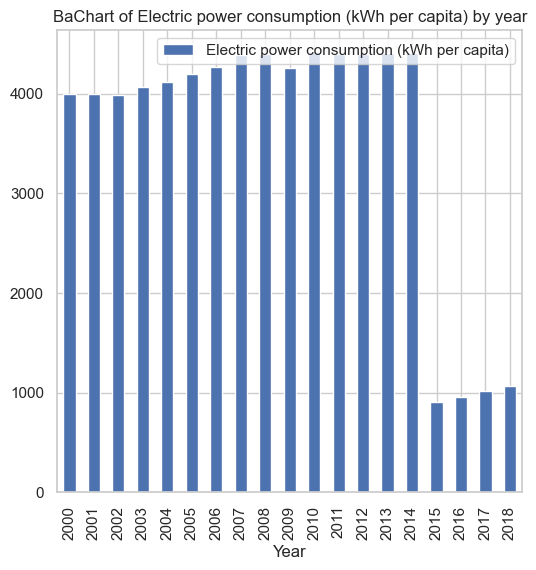

In [56]:
# Line chart of Arable Land

df_final_extracted_year.plot(x='Year', y=['Electric power consumption (kWh per capita)',], kind='bar', figsize=(6,6), title='BaChart of Electric power consumption (kWh per capita) by year')

plt.legend()
plt.show()

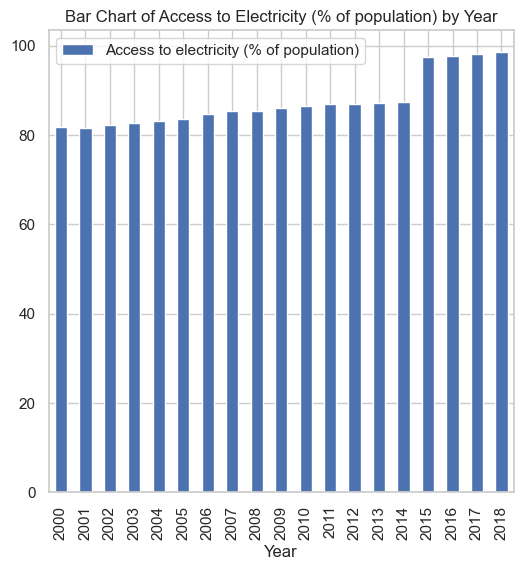

In [57]:
# Line chart of Access to Electricity

df_final_extracted_year.plot(x='Year', y=['Access to electricity (% of population)'], kind='bar', figsize=(6,6), title='Bar Chart of Access to Electricity (% of population) by Year')

plt.legend()
plt.show()

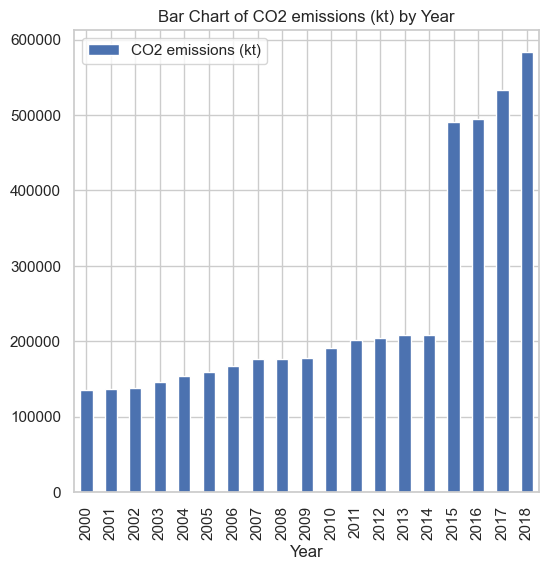

In [58]:
# Line chart of CO2 Emissions

df_final_extracted_year.plot(x='Year', y=['CO2 emissions (kt)'], kind='bar', figsize=(6,6), title='Bar Chart of CO2 emissions (kt) by Year')

plt.legend()
plt.show()

In [59]:
# View top 5 countries by Arable land

df_final_extracted_year.nlargest(5, 'Electric power consumption (kWh per capita)')

Year  Electric power consumption (kWh per capita)  \
10  2010                                  4415.254019   
13  2013                                  4405.984778   
14  2014                                  4403.896403   
8   2008                                  4401.612954   
11  2011                                  4398.635054   

    Access to electricity (% of population)  CO2 emissions (kt)  \
10                                86.405245       191197.310924   
13                                87.188254       208310.500000   
14                                87.325949       208519.083333   
8                                 85.427759       177218.205128   
11                                86.840064       201208.571429   

    Percentage Change in Electric Power Consumption  \
10                                         0.055203   
13                                         0.020153   
14                                         0.010671   
8                                          0.009866   
11                                         0.025634   

    Percentage Change in Access to Electricity  \
10                                    0.007048   
13                                    0.007366   
14                                    0.001801   
8                                     0.010665   
11                                    0.017319   

    Percentage Change in CO2 Emissions  
10                            0.131159  
13                            0.007534  
14                            0.021472  
8                             0.048866  
11                            0.033926

In [60]:
# View top 5 countries by Forest area

df_final_extracted_year.nlargest(5, 'Access to electricity (% of population)')

Year  Electric power consumption (kWh per capita)  \
18  2018                                  1064.000000   
17  2017                                  1021.000000   
16  2016                                   956.000000   
15  2015                                   910.000000   
14  2014                                  4403.896403   

    Access to electricity (% of population)  CO2 emissions (kt)  \
18                                98.510000       583110.000000   
17                                98.140000       532920.000000   
16                                97.620000       494980.000000   
15                                97.537367       490840.000000   
14                                87.325949       208519.083333   

    Percentage Change in Electric Power Consumption  \
18                                         0.042116   
17                                         0.067992   
16                                         0.050549   
15                                         0.120814   
14                                         0.010671   

    Percentage Change in Access to Electricity  \
18                                    0.003770   
17                                    0.005327   
16                                    0.000847   
15                                    0.005436   
14                                    0.001801   

    Percentage Change in CO2 Emissions  
18                            0.094179  
17                            0.076650  
16                            0.008435  
15                            0.001612  
14                            0.021472

In [61]:
# View top 5 countries by Forest area

df_final_extracted_year.nlargest(5, 'CO2 emissions (kt)')

Year  Electric power consumption (kWh per capita)  \
18  2018                                  1064.000000   
17  2017                                  1021.000000   
16  2016                                   956.000000   
15  2015                                   910.000000   
14  2014                                  4403.896403   

    Access to electricity (% of population)  CO2 emissions (kt)  \
18                                98.510000       583110.000000   
17                                98.140000       532920.000000   
16                                97.620000       494980.000000   
15                                97.537367       490840.000000   
14                                87.325949       208519.083333   

    Percentage Change in Electric Power Consumption  \
18                                         0.042116   
17                                         0.067992   
16                                         0.050549   
15                                         0.120814   
14                                         0.010671   

    Percentage Change in Access to Electricity  \
18                                    0.003770   
17                                    0.005327   
16                                    0.000847   
15                                    0.005436   
14                                    0.001801   

    Percentage Change in CO2 Emissions  
18                            0.094179  
17                            0.076650  
16                            0.008435  
15                            0.001612  
14                            0.021472

In [62]:
# Check the correlation between the variables (numerical) available in the dataframe
df_final_extracted_year_1 = df_final_extracted_year[['Year', 'Electric power consumption (kWh per capita)', 'Access to electricity (% of population)', 'CO2 emissions (kt)']]

df_final_extracted_year_1.corr()

Electric power consumption (kWh per capita)  \
Electric power consumption (kWh per capita)                                     1.000000   
Access to electricity (% of population)                                        -0.909878   
CO2 emissions (kt)                                                             -0.956526   

                                             Access to electricity (% of population)  \
Electric power consumption (kWh per capita)                                -0.909878   
Access to electricity (% of population)                                     1.000000   
CO2 emissions (kt)                                                          0.982993   

                                             CO2 emissions (kt)  
Electric power consumption (kWh per capita)           -0.956526  
Access to electricity (% of population)                0.982993  
CO2 emissions (kt)                                     1.000000

The above result indicates that over the years, there is about 91% reduction in access to electricity, and about 96% reduction in CO2 emissions per unit increase in electric power consumption. This however might not conform to reality, as the indicators had different units of measurement, and higher values than each other.

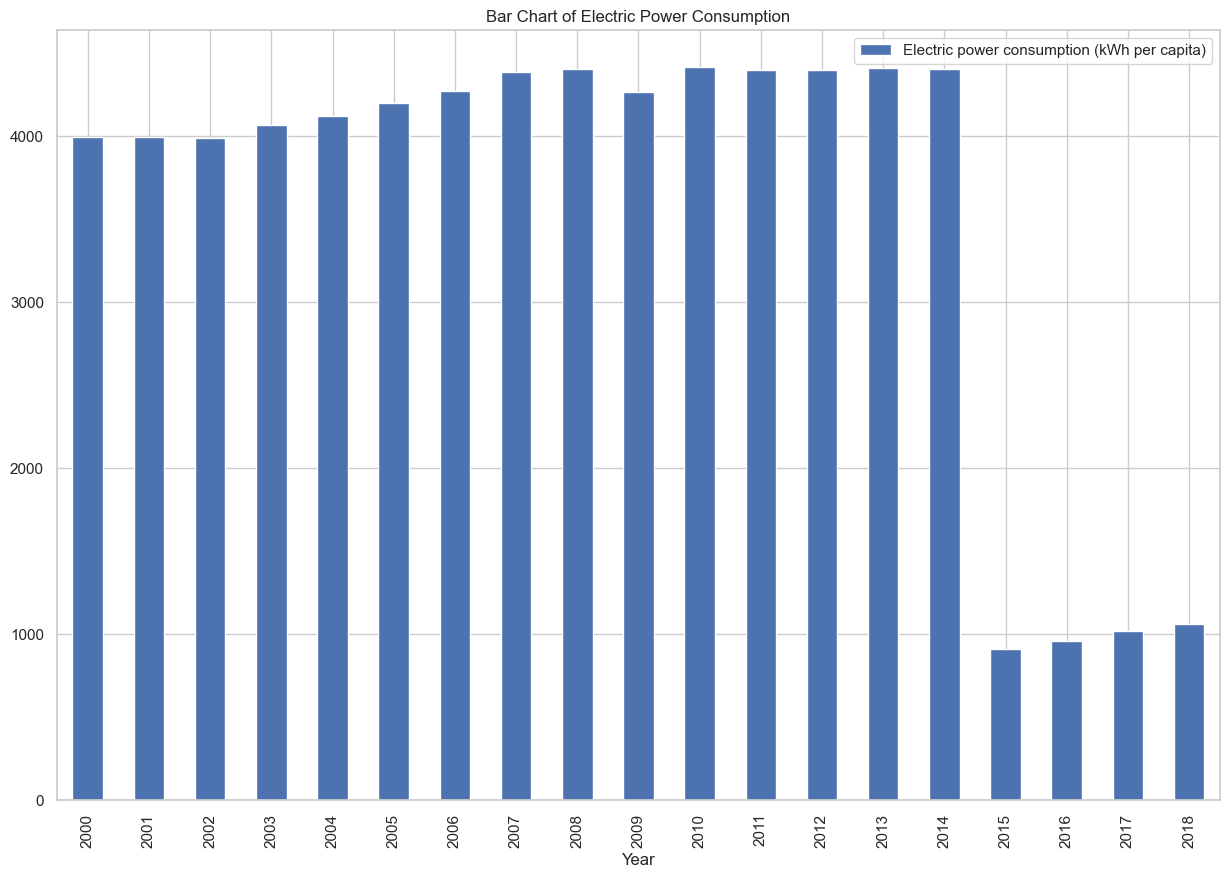

In [63]:
# Create a bar chart for comparing arable Land and forest area

df_final_extracted_year.plot(x='Year', y=['Electric power consumption (kWh per capita)'], kind='bar', figsize=(15,10), title='Bar Chart of Electric Power Consumption')

plt.legend()
plt.show()

#### Grouping by country

In [64]:
df_final_extracted_country = df_final_extracted[['Country Name', 'Country Code', 'Year', 'Electric power consumption (kWh per capita)', 
                                                 'Access to electricity (% of population)', 'CO2 emissions (kt)', 'Continent', 
                                                 'Percentage Change in Electric Power Consumption', 'Percentage Change in Access to Electricity',	
                                                 'Percentage Change in CO2 Emissions']].groupby('Country Name', as_index=False).mean()
df_final_extracted_country.head()

Country Name  Electric power consumption (kWh per capita)  \
0      Albania                                  1757.520942   
1      Algeria                                  1119.045938   
2       Angola                                   166.150634   
3    Argentina                                  2552.537630   
4      Armenia                                  1609.814858   

   Access to electricity (% of population)  CO2 emissions (kt)  \
0                                99.990000         4238.666667   
1                                98.943337       120485.714286   
2                                32.089498        23842.142857   
3                                97.558449       154880.666667   
4                                99.349319         4524.666667   

   Percentage Change in Electric Power Consumption  \
0                                         0.044679   
1                                        -0.002838   
2                                         0.115283   
3                                         0.028791   
4                                        -0.009698   

   Percentage Change in Access to Electricity  \
0                                   -0.000033   
1                                    0.000879   
2                                    0.043365   
3                                    0.003334   
4                                   -0.000163   

   Percentage Change in CO2 Emissions  
0                            0.040159  
1                            0.596538  
2                            0.081909  
3                            0.021094  
4                           -0.030133

In [65]:
# Summary Statistics

df_final_extracted_country.describe()

Electric power consumption (kWh per capita)  \
count                                   120.000000   
mean                                   4173.878813   
std                                    5578.330797   
min                                      33.576164   
25%                                     786.761215   
50%                                    2242.398621   
75%                                    5542.303390   
max                                   40004.735622   

       Access to electricity (% of population)  CO2 emissions (kt)  \
count                               120.000000        1.200000e+02   
mean                                 84.533608        1.710812e+05   
std                                  25.595197        6.547804e+05   
min                                   3.615560        5.986667e+02   
25%                                  81.857634        7.158500e+03   
50%                                  99.094887        3.125033e+04   
75%                                 100.000000        9.239833e+04   
max                                 100.000000        6.765154e+06   

       Percentage Change in Electric Power Consumption  \
count                                       120.000000   
mean                                          0.076761   
std                                           0.406254   
min                                          -0.312957   
25%                                           0.000208   
50%                                           0.017751   
75%                                           0.039489   
max                                           3.431373   

       Percentage Change in Access to Electricity  \
count                                  120.000000   
mean                                     0.022473   
std                                      0.139214   
min                                     -0.227314   
25%                                      0.000000   
50%                                      0.000062   
75%                                      0.012586   
max                                      1.484788   

       Percentage Change in CO2 Emissions  
count                          120.000000  
mean                             0.192522  
std                              0.968316  
min                             -0.295676  
25%                             -0.006163  
50%                              0.021013  
75%                              0.051137  
max                              7.513990

In [66]:
# Check for the correlation

df_final_extracted_country_corr = df_final_extracted_country[['Electric power consumption (kWh per capita)', 'Access to electricity (% of population)', 'CO2 emissions (kt)']]

df_final_extracted_country_corr.corr()

Electric power consumption (kWh per capita)  \
Electric power consumption (kWh per capita)                                     1.000000   
Access to electricity (% of population)                                         0.403702   
CO2 emissions (kt)                                                              0.005673   

                                             Access to electricity (% of population)  \
Electric power consumption (kWh per capita)                                 0.403702   
Access to electricity (% of population)                                     1.000000   
CO2 emissions (kt)                                                          0.114161   

                                             CO2 emissions (kt)  
Electric power consumption (kWh per capita)            0.005673  
Access to electricity (% of population)                0.114161  
CO2 emissions (kt)                                     1.000000

In [67]:
# Create a dataframe for the top 5 countries by Arable land

df_final_extracted_country_power_consumption_5 = df_final_extracted_country.nlargest(5, 'Electric power consumption (kWh per capita)')
df_final_extracted_country_power_consumption_5.head()

Country Name  Electric power consumption (kWh per capita)  \
46      Iceland                                 40004.735622   
81       Norway                                 24310.890490   
8       Bahrain                                 19359.141578   
20       Canada                                 16324.622278   
58       Kuwait                                 16118.738770   

    Access to electricity (% of population)  CO2 emissions (kt)  \
46                                    100.0         2150.666667   
81                                    100.0        37452.000000   
8                                     100.0        22576.666667   
20                                    100.0       540762.666667   
58                                    100.0        68796.666667   

    Percentage Change in Electric Power Consumption  \
46                                         0.057575   
81                                        -0.005055   
8                                         -0.002158   
20                                        -0.004254   
58                                         0.006006   

    Percentage Change in Access to Electricity  \
46                                         0.0   
81                                         0.0   
8                                          0.0   
20                                         0.0   
58                                         0.0   

    Percentage Change in CO2 Emissions  
46                           -0.001210  
81                           -0.000390  
8                             0.046485  
20                            0.008910  
58                            0.044740

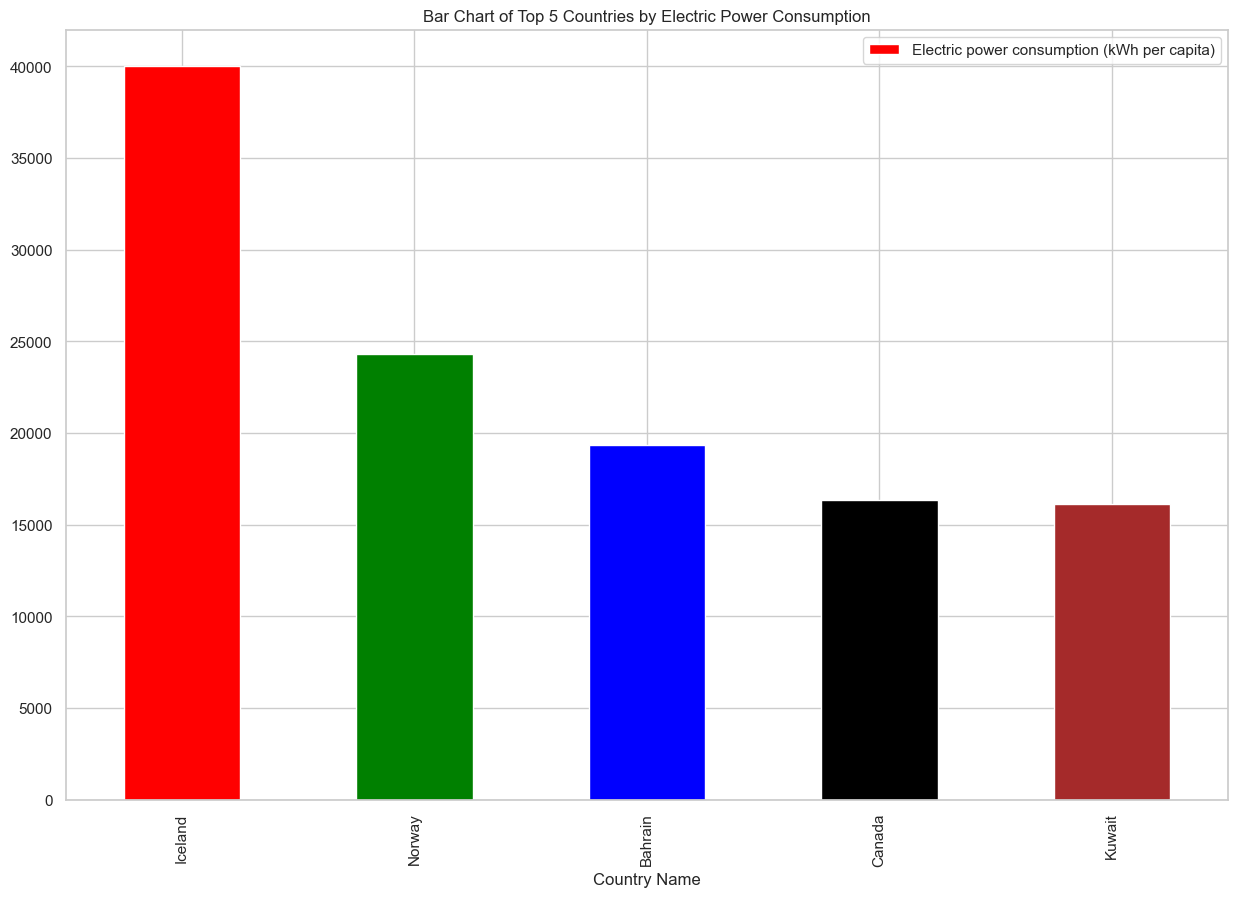

In [68]:
# Plot a bar chart for the top 5 countries by arable land
c=['red', 'green', 'blue', 'black', 'brown']
df_final_extracted_country_power_consumption_5.plot(x='Country Name', y='Electric power consumption (kWh per capita)', kind='bar', color= c, figsize=(15,10), title='Bar Chart of Top 5 Countries by Electric Power Consumption')

plt.legend()
plt.show()

In [69]:
df_final_extracted_country_elect_access_5 = df_final_extracted_country.nlargest(5, 'Access to electricity (% of population)')
df_final_extracted_country_elect_access_5.head()

Country Name  Electric power consumption (kWh per capita)  \
5     Australia                                 10543.325438   
6       Austria                                  8011.331971   
8       Bahrain                                 19359.141578   
10      Belarus                                  3352.041566   
11      Belgium                                  8277.249945   

    Access to electricity (% of population)  CO2 emissions (kt)  \
5                                     100.0       371690.000000   
6                                     100.0        69258.666667   
8                                     100.0        22576.666667   
10                                    100.0        56929.333333   
11                                    100.0       106014.000000   

    Percentage Change in Electric Power Consumption  \
5                                          0.000479   
6                                          0.012386   
8                                         -0.002158   
10                                         0.014161   
11                                        -0.001499   

    Percentage Change in Access to Electricity  \
5                                          0.0   
6                                          0.0   
8                                          0.0   
10                                         0.0   
11                                         0.0   

    Percentage Change in CO2 Emissions  
5                             0.007170  
6                             0.000026  
8                             0.046485  
10                            0.005967  
11                           -0.015349

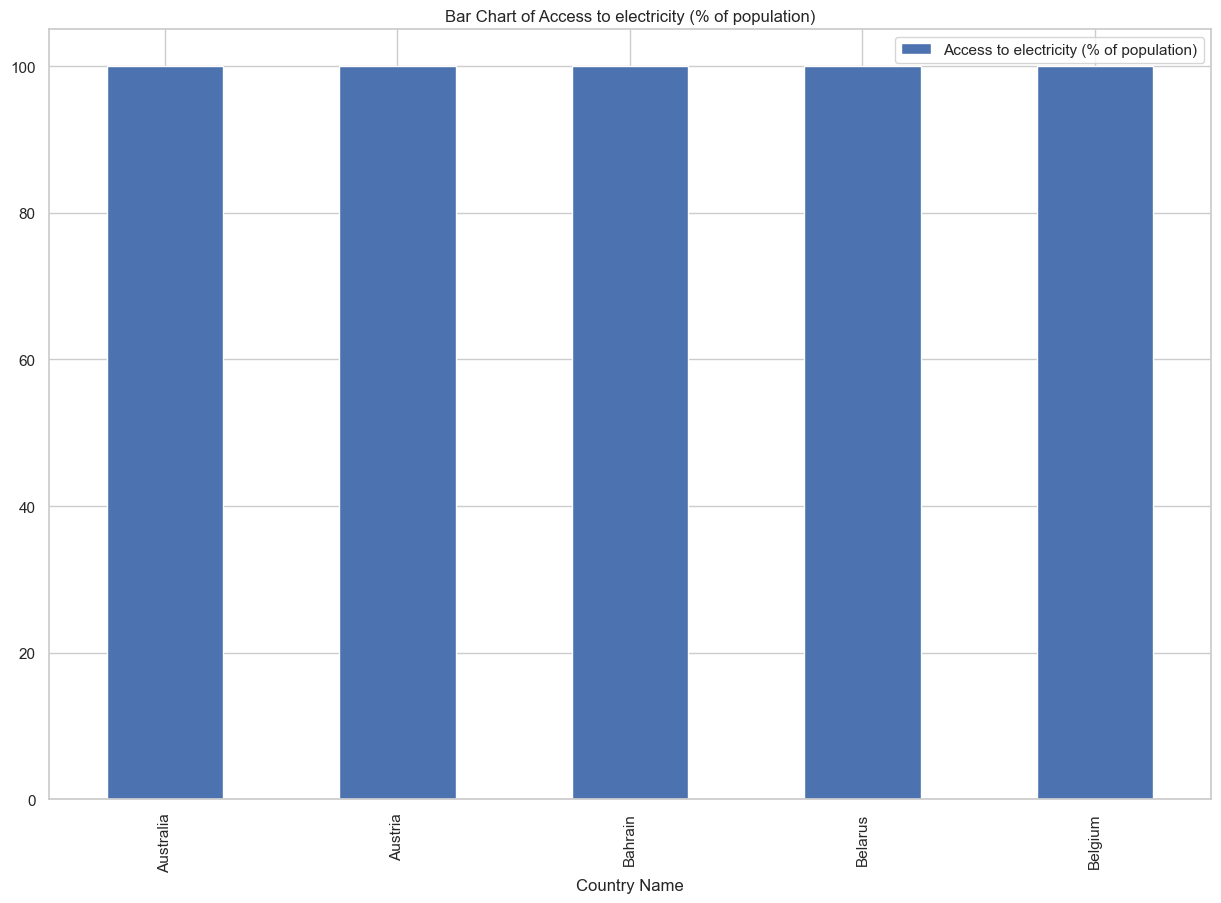

In [70]:
# Plot a bar chart for the top 5 countries by forest area

df_final_extracted_country_elect_access_5.plot(x='Country Name', y=['Access to electricity (% of population)'], kind='bar', figsize=(15,10), title='Bar Chart of Access to electricity (% of population)')

plt.legend()
plt.show()

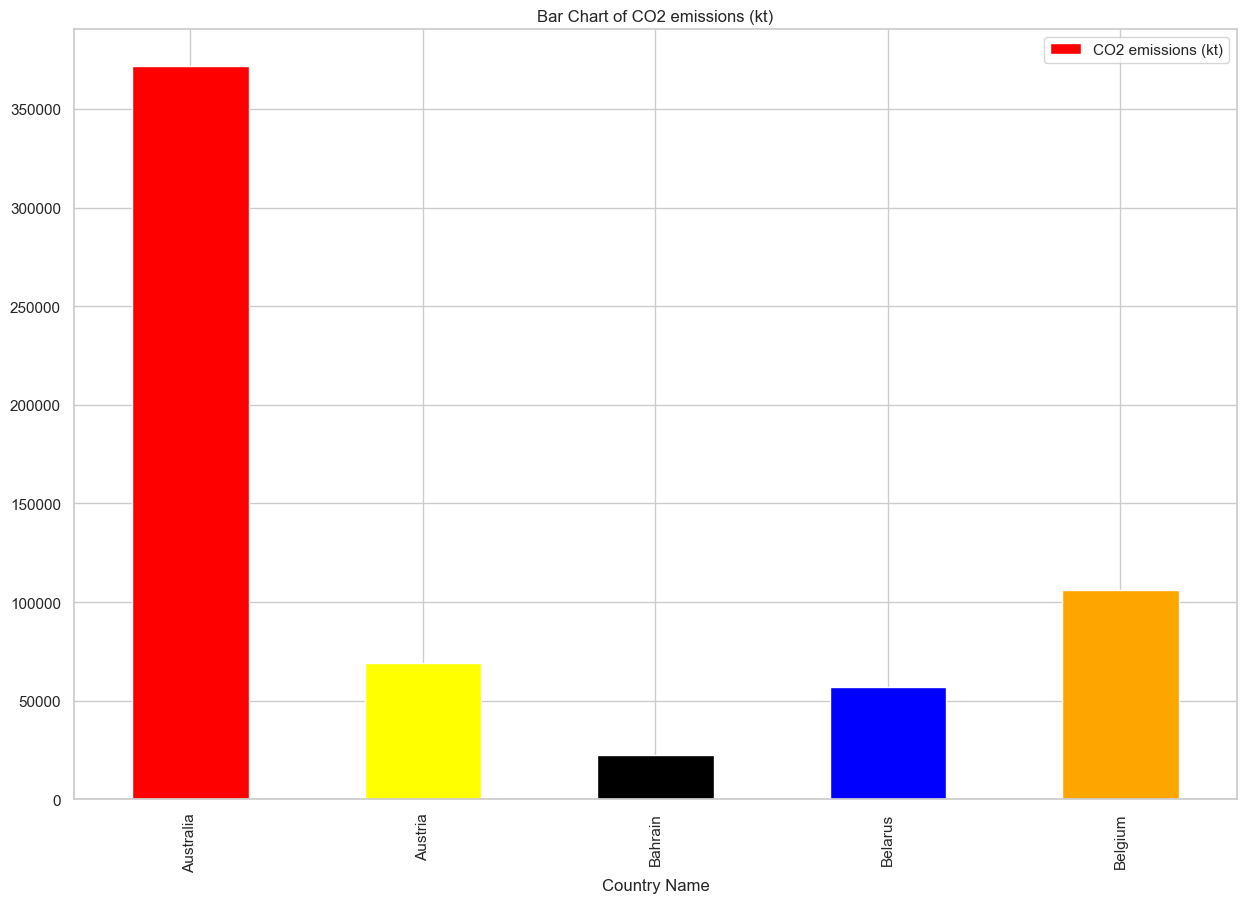

In [71]:
# Plot a bar chart for the top 5 countries by forest area

df_final_extracted_country_elect_access_5.plot(x='Country Name', y='CO2 emissions (kt)', kind='bar', color = ['red', 'yellow', 'black', 'blue', 'orange'], figsize=(15,10), title='Bar Chart of CO2 emissions (kt)')

plt.legend()
plt.show()

In [72]:
df_final_extracted_country_co2_emission_5 = df_final_extracted_country.nlargest(5, 'Access to electricity (% of population)')
df_final_extracted_country_elect_access_5.head()

Country Name  Electric power consumption (kWh per capita)  \
5     Australia                                 10543.325438   
6       Austria                                  8011.331971   
8       Bahrain                                 19359.141578   
10      Belarus                                  3352.041566   
11      Belgium                                  8277.249945   

    Access to electricity (% of population)  CO2 emissions (kt)  \
5                                     100.0       371690.000000   
6                                     100.0        69258.666667   
8                                     100.0        22576.666667   
10                                    100.0        56929.333333   
11                                    100.0       106014.000000   

    Percentage Change in Electric Power Consumption  \
5                                          0.000479   
6                                          0.012386   
8                                         -0.002158   
10                                         0.014161   
11                                        -0.001499   

    Percentage Change in Access to Electricity  \
5                                          0.0   
6                                          0.0   
8                                          0.0   
10                                         0.0   
11                                         0.0   

    Percentage Change in CO2 Emissions  
5                             0.007170  
6                             0.000026  
8                             0.046485  
10                            0.005967  
11                           -0.015349

### Visualizing data for top-3 countries by electric power consumption

Next, we shall pick three countries and visualize their data (taking Electricity Power Consumption into consideration). The selected countries are:

1. Iceland
2. Norway and
3. Bahrain

#### Iceland

In [73]:
df_iceland = df_final_extracted[df_final_extracted['Country Name'] == 'Iceland']
df_iceland.head()

Country Name Country Code  Year  \
4938      Iceland          ISL  2000   
4939      Iceland          ISL  2001   
4940      Iceland          ISL  2002   
4941      Iceland          ISL  2003   
4942      Iceland          ISL  2004   

      Electric power consumption (kWh per capita)  \
4938                                 26201.525577   
4939                                 26950.394430   
4940                                 27896.898683   
4941                                 27666.386894   
4942                                 28215.452248   

      Access to electricity (% of population)  CO2 emissions (kt) Continent  \
4938                                    100.0              2230.0    Europe   
4939                                    100.0              2160.0    Europe   
4940                                    100.0              2240.0    Europe   
4941                                    100.0              2230.0    Europe   
4942                                    100.0              2320.0    Europe   

      Percentage Change in Electric Power Consumption  \
4938                                         0.068481   
4939                                         0.028581   
4940                                         0.035120   
4941                                        -0.008263   
4942                                         0.019846   

      Percentage Change in Access to Electricity  \
4938                                         0.0   
4939                                         0.0   
4940                                         0.0   
4941                                         0.0   
4942                                         0.0   

      Percentage Change in CO2 Emissions  
4938                            0.051887  
4939                           -0.031390  
4940                            0.037037  
4941                           -0.004464  
4942                            0.040359

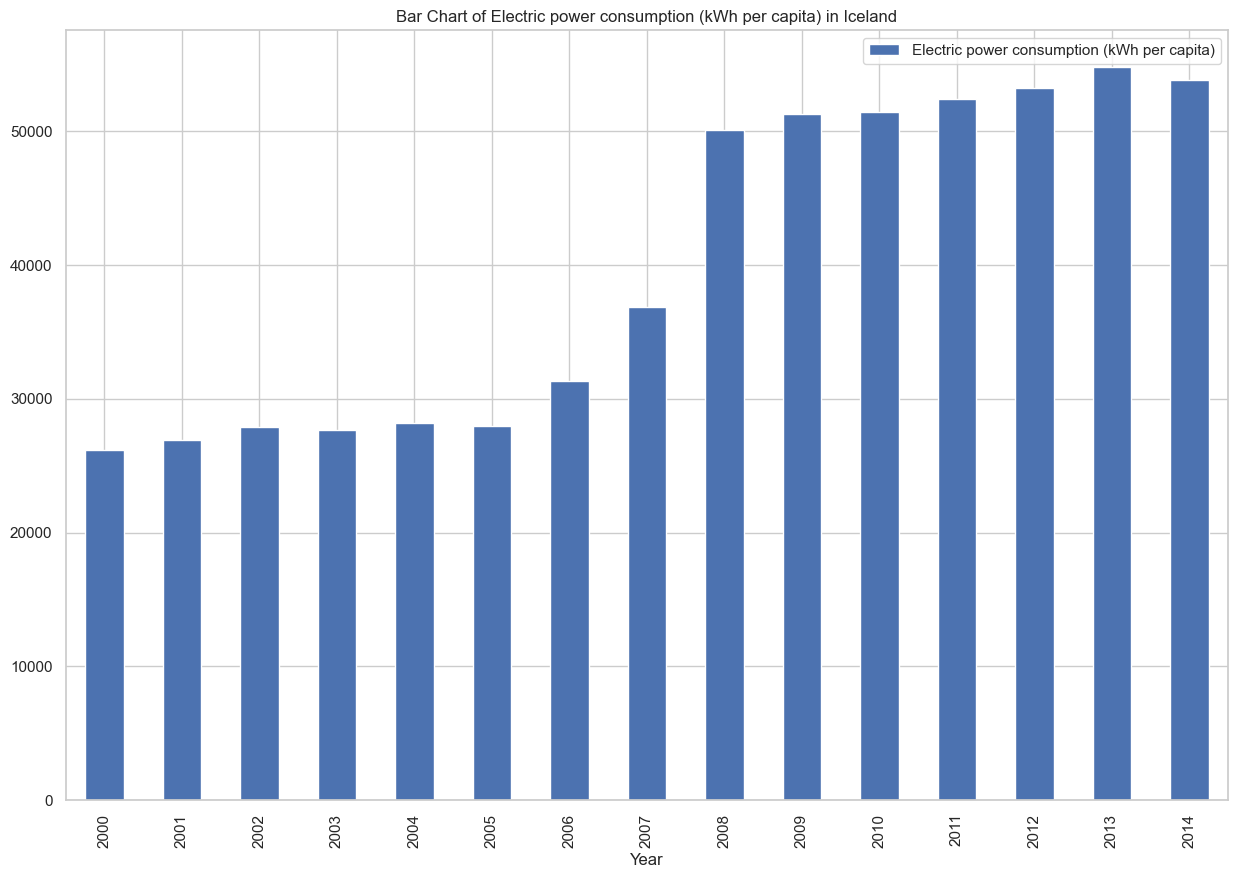

In [74]:
# Line plot of Percentage Change in Arable Land vs Percentage Change in Forest Area by Year

df_iceland.plot(kind='bar', x='Year', y=['Electric power consumption (kWh per capita)'], figsize=(15, 10), title='Bar Chart of Electric power consumption (kWh per capita) in Iceland')

plt.legend()
plt.show()

The above chart shows that electric power consumption in Iceland has continued to increase over the years.

#### Norway

In [75]:
df_norway = df_final_extracted[df_final_extracted['Country Name'] == 'Norway']
df_norway.head()

Country Name Country Code  Year  \
7666       Norway          NOR  2000   
7667       Norway          NOR  2001   
7668       Norway          NOR  2002   
7669       Norway          NOR  2003   
7670       Norway          NOR  2004   

      Electric power consumption (kWh per capita)  \
7666                                 24993.726295   
7667                                 25590.689429   
7668                                 24620.336132   
7669                                 23201.394130   
7670                                 24214.106984   

      Access to electricity (% of population)  CO2 emissions (kt) Continent  \
7666                                    100.0             34080.0    Europe   
7667                                    100.0             34780.0    Europe   
7668                                    100.0             34470.0    Europe   
7669                                    100.0             37120.0    Europe   
7670                                    100.0             37460.0    Europe   

      Percentage Change in Electric Power Consumption  \
7666                                        -0.002533   
7667                                         0.023885   
7668                                        -0.037918   
7669                                        -0.057633   
7670                                         0.043649   

      Percentage Change in Access to Electricity  \
7666                                         0.0   
7667                                         0.0   
7668                                         0.0   
7669                                         0.0   
7670                                         0.0   

      Percentage Change in CO2 Emissions  
7666                           -0.134366  
7667                            0.020540  
7668                           -0.008913  
7669                            0.076878  
7670                            0.009159

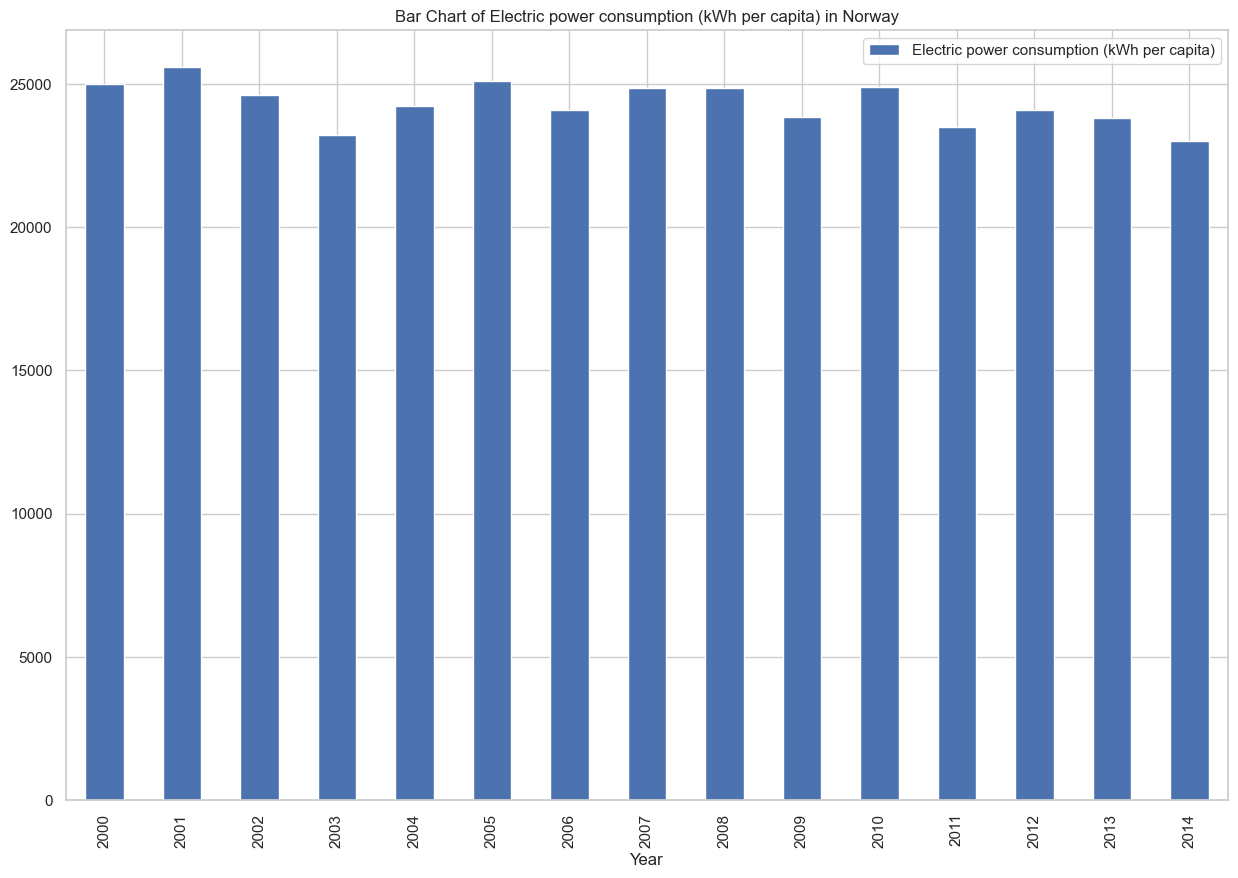

In [76]:
# Line plot of Percentage Change in Arable Land vs Percentage Change in Forest Area by Year

df_norway.plot(kind='bar', x='Year', y=['Electric power consumption (kWh per capita)'], figsize=(15, 10), title='Bar Chart of Electric power consumption (kWh per capita) in Norway')

plt.legend()
plt.show()

The above chart shows that in Norway, there has been increase and decrease in electric power consumption. However, we observed that there are more increase than decrease.

#### Bahrain

In [77]:
df_bahrain = df_final_extracted[df_final_extracted['Country Name'] == 'Bahrain']
df_bahrain.head()

Country Name Country Code  Year  \
1218      Bahrain          BHR  2000   
1219      Bahrain          BHR  2001   
1220      Bahrain          BHR  2002   
1221      Bahrain          BHR  2003   
1222      Bahrain          BHR  2004   

      Electric power consumption (kWh per capita)  \
1218                                 20014.745490   
1219                                 20130.456598   
1220                                 20016.595478   
1221                                 19775.063310   
1222                                 18983.040227   

      Access to electricity (% of population)  CO2 emissions (kt) Continent  \
1218                                    100.0             15880.0      Asia   
1219                                    100.0             16390.0      Asia   
1220                                    100.0             17220.0      Asia   
1221                                    100.0             17960.0      Asia   
1222                                    100.0             17930.0      Asia   

      Percentage Change in Electric Power Consumption  \
1218                                        -0.030206   
1219                                         0.005781   
1220                                        -0.005656   
1221                                        -0.012067   
1222                                        -0.040052   

      Percentage Change in Access to Electricity  \
1218                                         0.0   
1219                                         0.0   
1220                                         0.0   
1221                                         0.0   
1222                                         0.0   

      Percentage Change in CO2 Emissions  
1218                            0.027832  
1219                            0.032116  
1220                            0.050641  
1221                            0.042973  
1222                           -0.001670

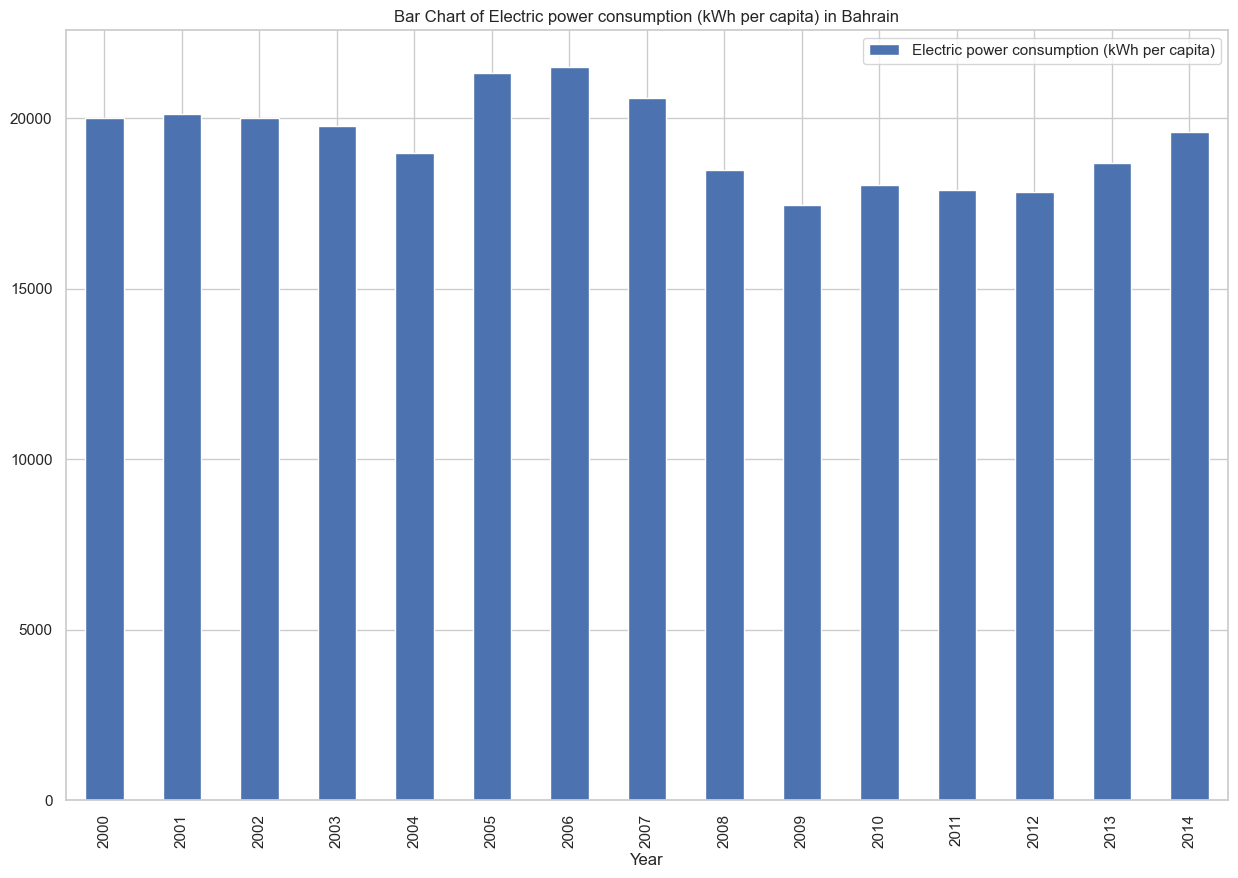

In [78]:
# Line plot of Percentage Change in Arable Land vs Percentage Change in Forest Area by Year

df_bahrain.plot(kind='bar', x='Year', y=['Electric power consumption (kWh per capita)'], figsize=(15, 10), title='Bar Chart of Electric power consumption (kWh per capita) in Bahrain')

plt.legend()
plt.show()

The above chart shows that in Bahrain, there has been increase and decrease in electric power consumption. However, we observed that there are more increase than decrease.

#### Percentage Change in the metrics

##### Iceland

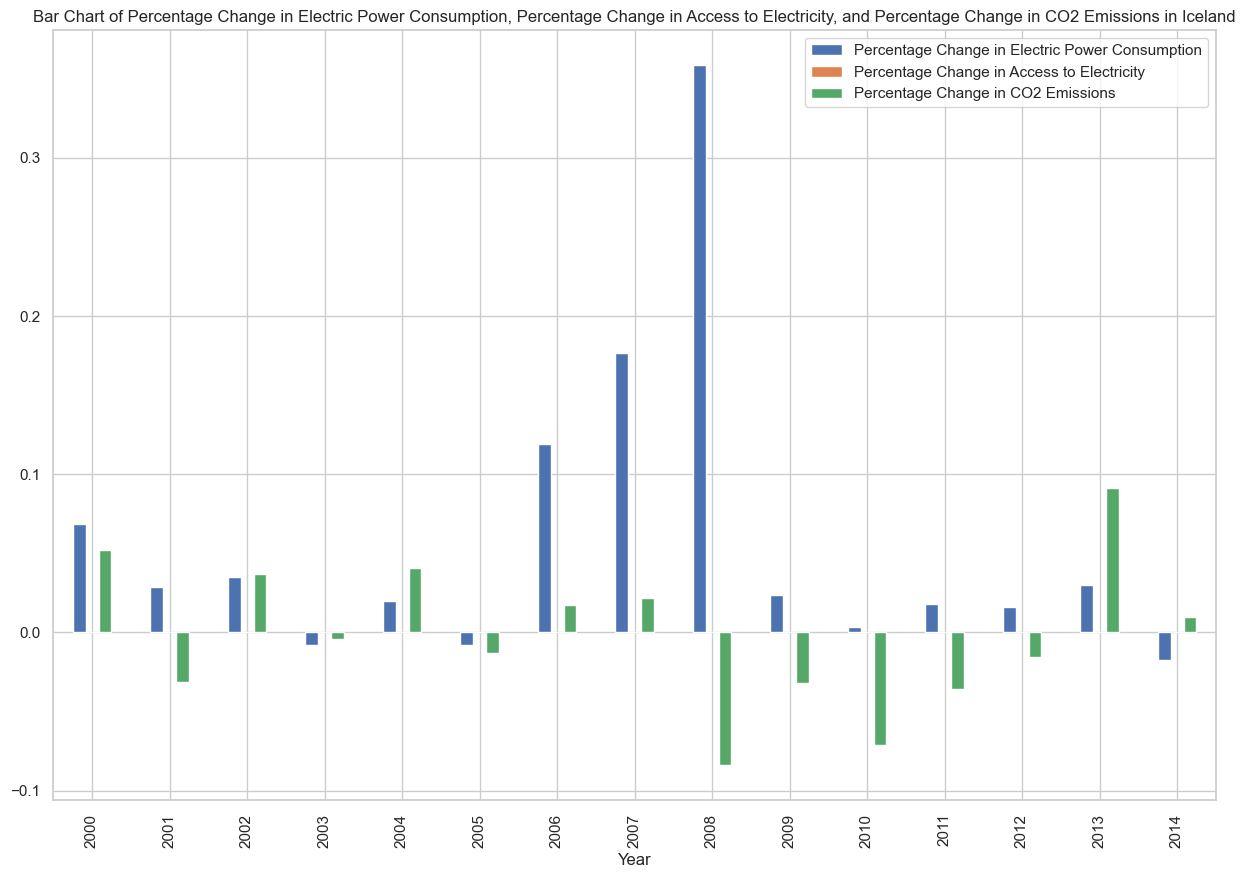

In [79]:
df_iceland.plot(kind='bar', x='Year', y=['Percentage Change in Electric Power Consumption', 'Percentage Change in Access to Electricity', 'Percentage Change in CO2 Emissions'], figsize=(15, 10), title='Bar Chart of Percentage Change in Electric Power Consumption, Percentage Change in Access to Electricity, and Percentage Change in CO2 Emissions in Iceland')

plt.legend()
plt.show()

##### Norway

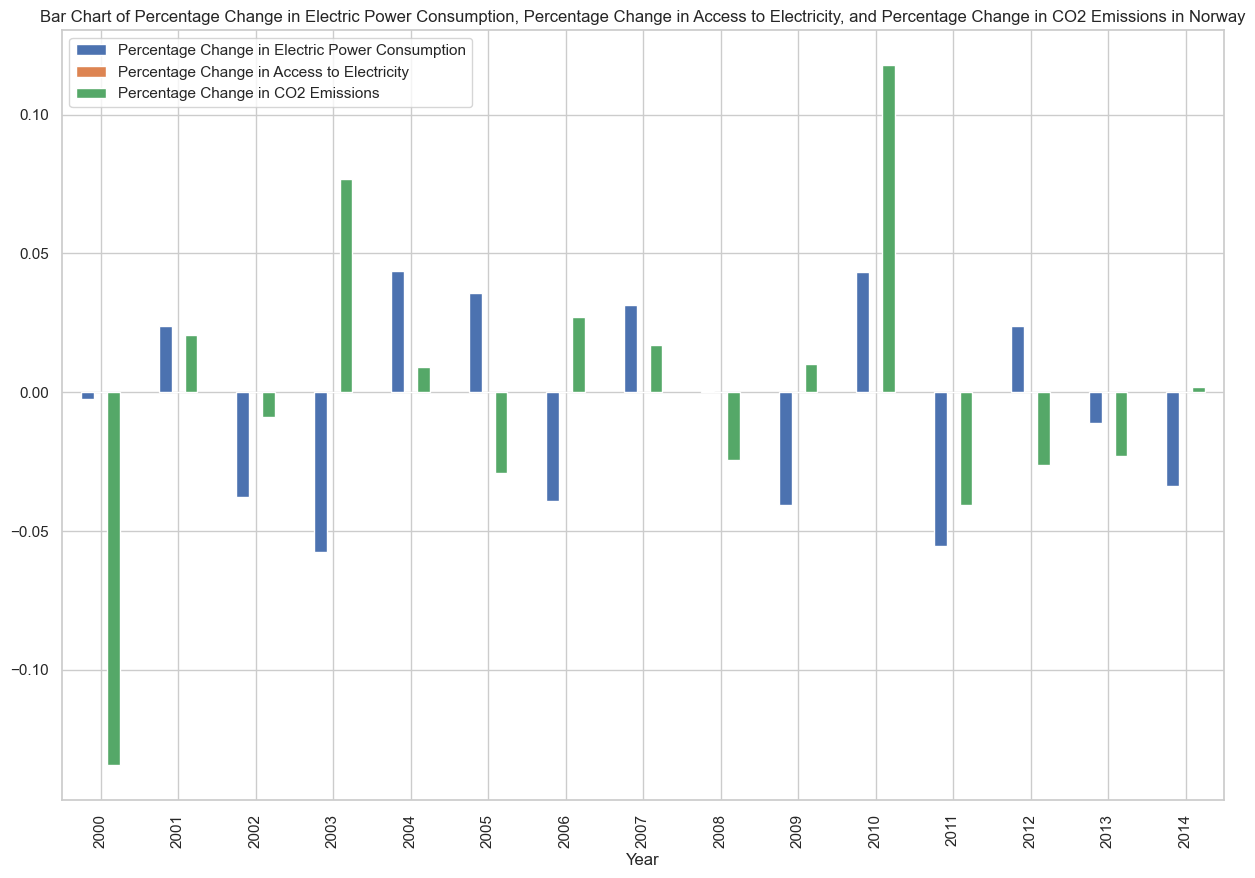

In [80]:
df_norway.plot(kind='bar', x='Year', y=['Percentage Change in Electric Power Consumption', 'Percentage Change in Access to Electricity', 'Percentage Change in CO2 Emissions'], figsize=(15, 10), title='Bar Chart of Percentage Change in Electric Power Consumption, Percentage Change in Access to Electricity, and Percentage Change in CO2 Emissions in Norway')

plt.legend()
plt.show()

##### Bahrain

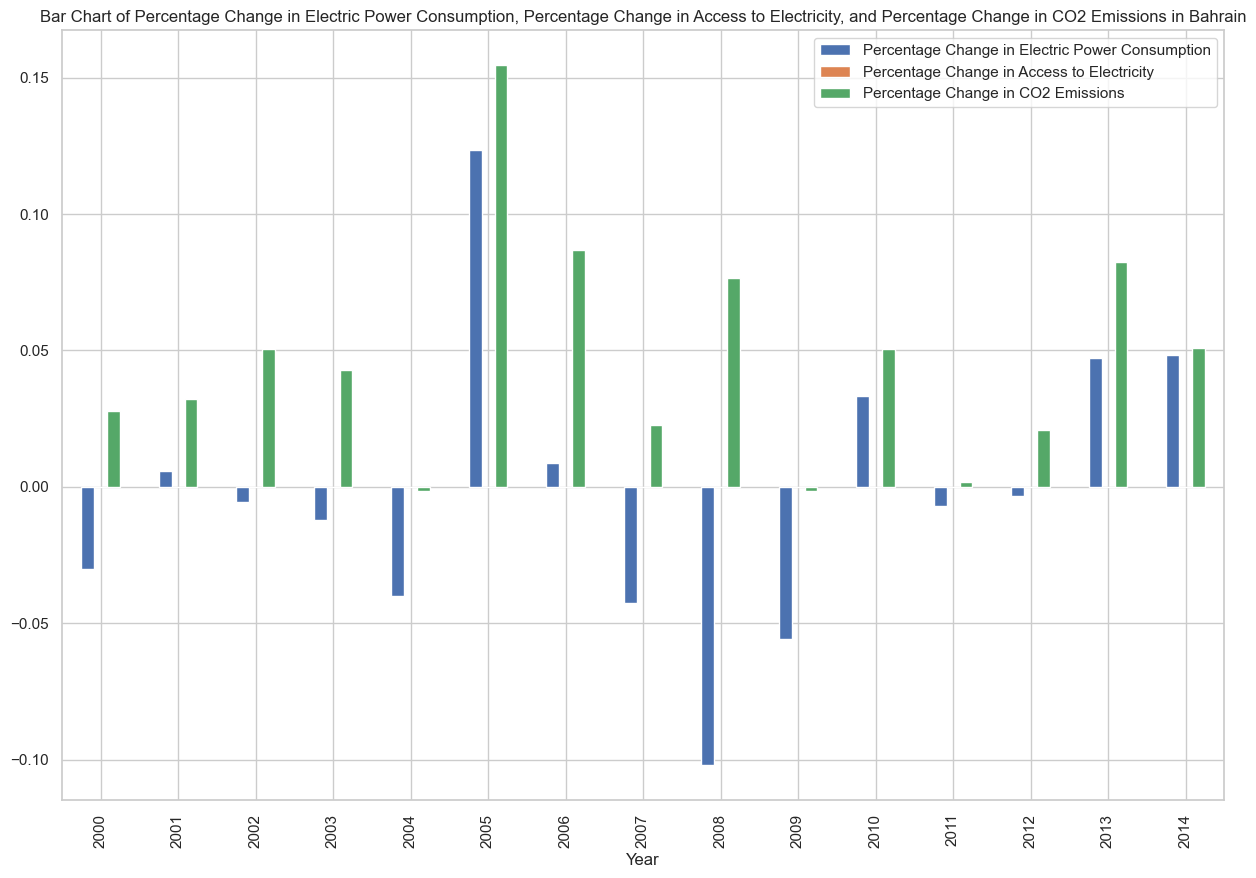

In [81]:
df_bahrain.plot(kind='bar', x='Year', y=['Percentage Change in Electric Power Consumption', 'Percentage Change in Access to Electricity', 'Percentage Change in CO2 Emissions'], figsize=(15, 10), title='Bar Chart of Percentage Change in Electric Power Consumption, Percentage Change in Access to Electricity, and Percentage Change in CO2 Emissions in Bahrain')

plt.legend()
plt.show()